**`Introduction to Unsupervised Machine Learning: Clustering`**

Unsupervised learning is a type of machine learning
where algorithms learn patterns from unlabeled data without
explicit guidance or supervision. Unlike supervised learning
(which predicts known outputs), unsupervised learning discovers
hidden patterns, structures, or relationships within data.

  **Key Characteristics of Unsupervised Learning:**

**No labels/target variables:** The data provided to unsupervised learning algorithms only consists of features or input variables, with no predefined output labels or target variables to guide the learning process.

**Exploratory:** The primary goal of unsupervised learning is often exploratory. It's used to discover unknown patterns, groupings, or structures within the data that might not be obvious through direct observation.

**Dimensionality reduction:** Unsupervised techniques can simplify complex data by reducing the number of variables (dimensions) while retaining important information, making data easier to visualize and analyze.

**Anomaly detection:** It's effective at identifying unusual patterns or outliers in data, which can be crucial for fraud detection, system monitoring, or quality control.


**1. Data Preparation**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings('ignore')

# Load data
data = pd.DataFrame({
    'Medicine': ['A', 'B', 'C', 'D'],
    'Weight_index': [1, 2, 4, 5],
    'Ph': [1, 1, 3, 4]
})

# Features for clustering
X = data[['Weight_index', 'Ph']].values

**2.  Visualize the Data**

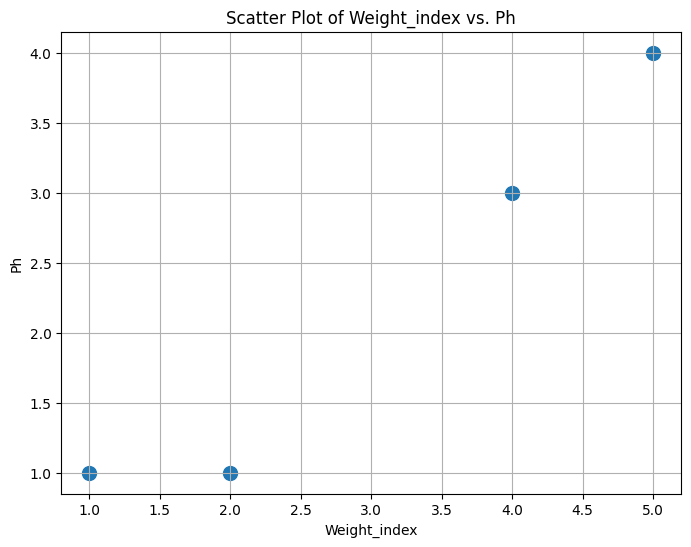

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=100) # X[:, 0] is Weight_index, X[:, 1] is Ph
plt.xlabel('Weight_index')
plt.ylabel('Ph')
plt.title('Scatter Plot of Weight_index vs. Ph')
plt.grid(True)
plt.show()

**3. K-Means Clustering**

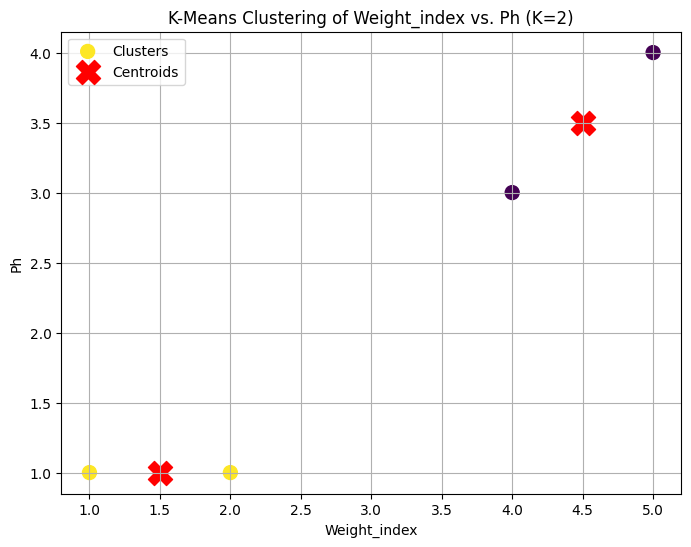

,Medicine,Weight_index,Ph,Cluster
0,A,1,1,1
1,B,2,1,1
2,C,4,3,0
3,D,5,4,0


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
clusters = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=100, cmap='viridis', label='Clusters')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Weight_index')
plt.ylabel('Ph')
plt.title('K-Means Clustering of Weight_index vs. Ph (K=2)')
plt.grid(True)
plt.legend()
plt.show()

data['Cluster'] = clusters
display(data)

**4. Hierarchical Clustering**

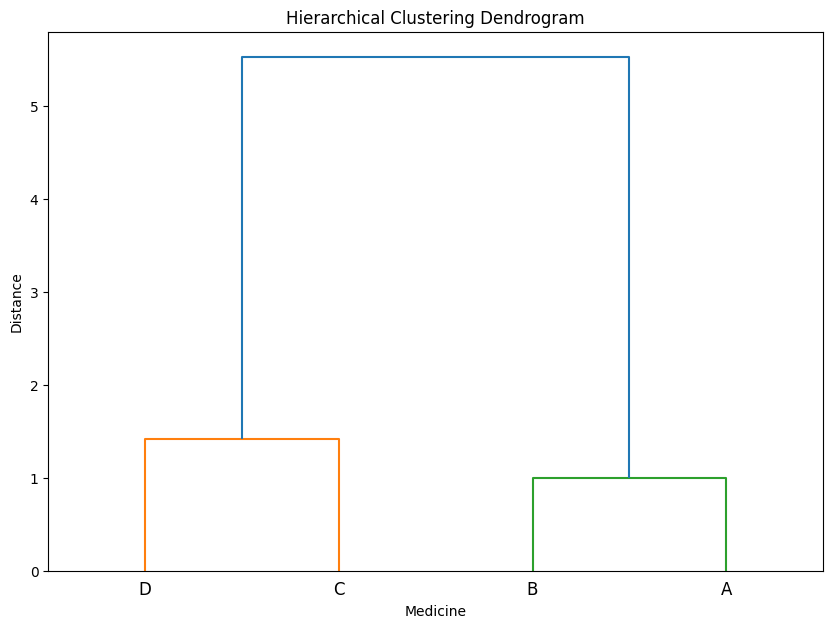

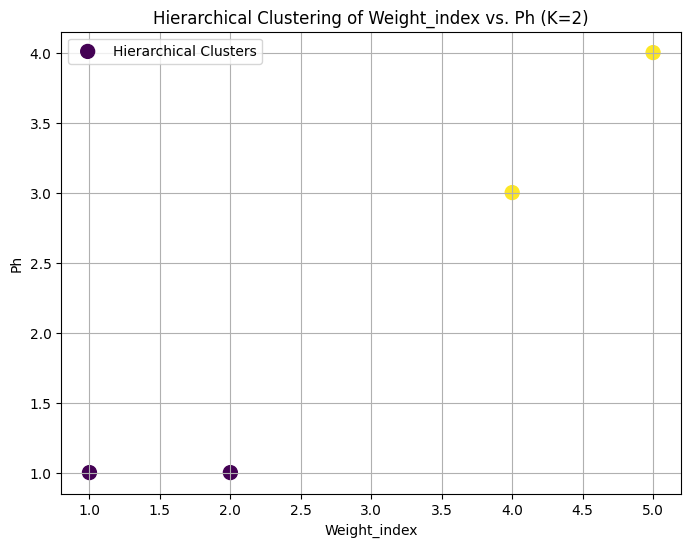

,Medicine,Weight_index,Ph,Cluster,Hierarchical_Cluster
0,A,1,1,1,1
1,B,2,1,1,1
2,C,4,3,0,2
3,D,5,4,0,2


In [ ]:
from scipy.cluster.hierarchy import fcluster

linked = linkage(X, method='ward')

# Get cluster assignments for 2 clusters
hierarchical_clusters = fcluster(linked, 2, criterion='maxclust')

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=data['Medicine'].values,
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Medicine')
plt.ylabel('Distance')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=hierarchical_clusters, s=100, cmap='viridis', label='Hierarchical Clusters')
plt.xlabel('Weight_index')
plt.ylabel('Ph')
plt.title('Hierarchical Clustering of Weight_index vs. Ph (K=2)')
plt.grid(True)
plt.legend()
plt.show()

data['Hierarchical_Cluster'] = hierarchical_clusters
display(data)

**5. Comparison and Analysis**

In [ ]:
print("=" * 50)
print("FINAL CLUSTERING RESULTS")
print("=" * 50)
print(data[['Medicine', 'Weight_index', 'Ph',
            'Cluster', 'Hierarchical_Cluster']])
print("\n")

# Analyze the clusters
print("CLUSTER ANALYSIS:")
print("-" * 30)

# Cluster 0 (Medicines A & B)
print("Cluster 0 (Low Weight Index, Low Ph):")
cluster0 = data[data['Cluster'] == 0]
print(f"Medicines: {', '.join(cluster0['Medicine'].values)}")
print(f"Avg Weight Index: {cluster0['Weight_index'].mean():.2f}")
print(f"Avg Ph: {cluster0['Ph'].mean():.2f}")

print("\n")

# Cluster 1 (Medicines C & D)
print("Cluster 1 (High Weight Index, High Ph):")
cluster1 = data[data['Cluster'] == 1]
print(f"Medicines: {', '.join(cluster1['Medicine'].values)}")
print(f"Avg Weight Index: {cluster1['Weight_index'].mean():.2f}")
print(f"Avg Ph: {cluster1['Ph'].mean():.2f}")

FINAL CLUSTERING RESULTS
  Medicine  Weight_index  Ph  Cluster  Hierarchical_Cluster
0        A             1   1        1                     1
1        B             2   1        1                     1
2        C             4   3        0                     2
3        D             5   4        0                     2


CLUSTER ANALYSIS:
------------------------------
Cluster 0 (Low Weight Index, Low Ph):
Medicines: C, D
Avg Weight Index: 4.50
Avg Ph: 3.50


Cluster 1 (High Weight Index, High Ph):
Medicines: A, B
Avg Weight Index: 1.50
Avg Ph: 1.00


**6.  Interpretation and Insights**

In [ ]:
print("\n" + "=" * 50)
print("KEY INSIGHTS")
print("=" * 50)
print("1. Both K-Means and Hierarchical clustering produce")
print("   identical clusters for this dataset.")
print("\n2. Natural Clusters Identified:")
print("   • Cluster 0: Low-weight, low-pH medicines (A, B)")
print("   • Cluster 1: High-weight, high-pH medicines (C, D)")
print("\n3. The clear separation in the feature space makes")
print("   this an ideal case for clustering.")
print("\n4. Applications:")
print("   • Group similar medicines for storage")
print("   • Identify medication categories")
print("   • Optimize production based on properties")


KEY INSIGHTS
1. Both K-Means and Hierarchical clustering produce
   identical clusters for this dataset.

2. Natural Clusters Identified:
   • Cluster 0: Low-weight, low-pH medicines (A, B)
   • Cluster 1: High-weight, high-pH medicines (C, D)

3. The clear separation in the feature space makes
   this an ideal case for clustering.

4. Applications:
   • Group similar medicines for storage
   • Identify medication categories
   • Optimize production based on properties


**All in one**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
# Load data
data = pd.DataFrame({
    'Medicine': ['A', 'B', 'C', 'D'],
    'Weight_index': [1, 2, 4, 5],
    'Ph': [1, 1, 3, 4]
})
X = data[['Weight_index', 'Ph']].values


### K-Means Clustering

In [3]:
# Perform K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
data['KMeans_Cluster'] = kmeans.fit_predict(X)


### Hierarchical Clustering

In [4]:
# Perform Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
data['Hierarchical_Cluster'] = hierarchical.fit_predict(X)


### Visualization of Clustered Data

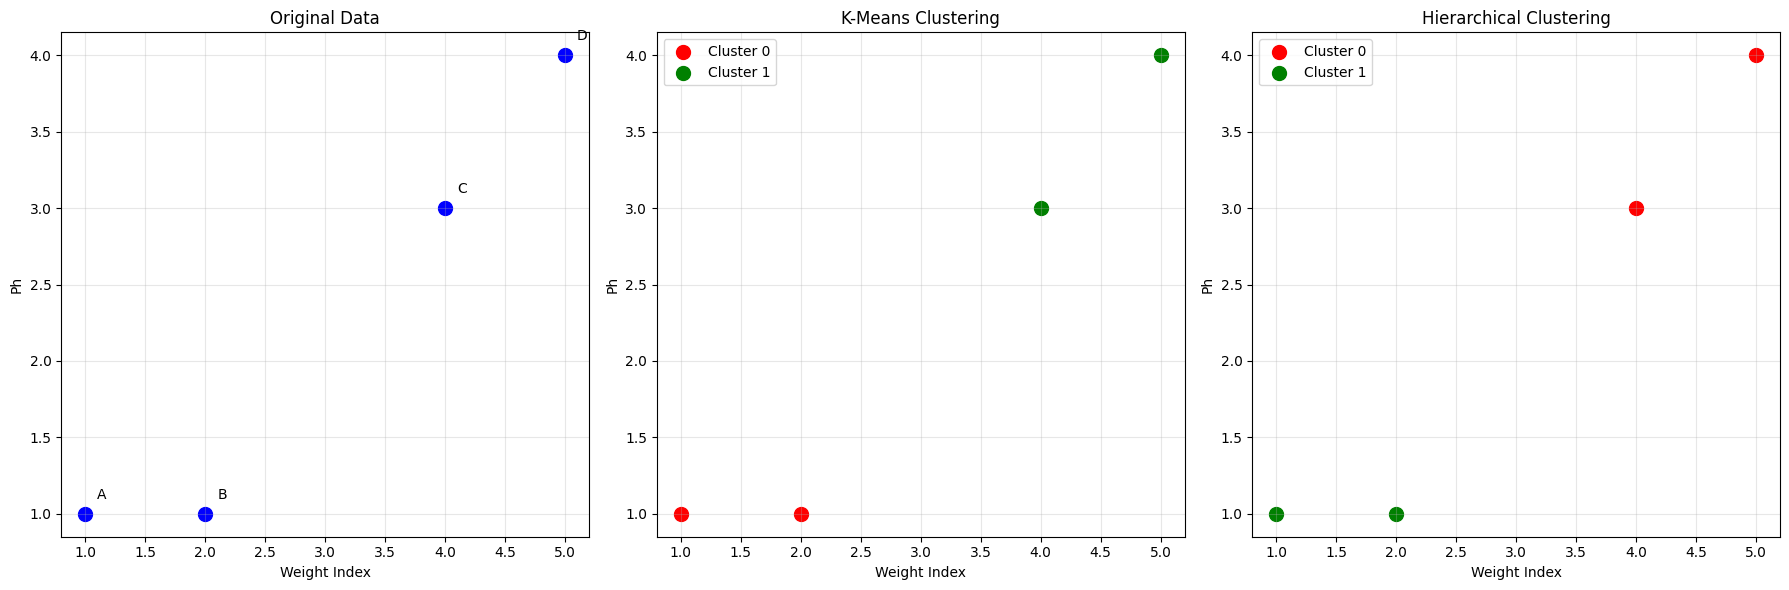

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Original data
axes[0].scatter(data['Weight_index'], data['Ph'], c='blue', s=100)
for i, med in enumerate(data['Medicine']):
    axes[0].text(data['Weight_index'][i] + 0.1, data['Ph'][i] + 0.1, med)
axes[0].set_title('Original Data')
axes[0].set_xlabel('Weight Index')
axes[0].set_ylabel('Ph')
axes[0].grid(True, alpha=0.3)

# K-Means results
colors = ['red', 'green']
for i in range(2):
    cluster_data = data[data['KMeans_Cluster'] == i]
    axes[1].scatter(cluster_data['Weight_index'], cluster_data['Ph'],
                    s=100, c=colors[i], label=f'Cluster {i}')
axes[1].set_title('K-Means Clustering')
axes[1].set_xlabel('Weight Index')
axes[1].set_ylabel('Ph')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Hierarchical results
for i in range(2):
    cluster_data = data[data['Hierarchical_Cluster'] == i]
    axes[2].scatter(cluster_data['Weight_index'], cluster_data['Ph'],
                    s=100, c=colors[i], label=f'Cluster {i}')
axes[2].set_title('Hierarchical Clustering')
axes[2].set_xlabel('Weight Index')
axes[2].set_ylabel('Ph')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# Load data
data = pd.DataFrame({
    'Medicine': ['A', 'B', 'C', 'D'],
    'Weight_index': [1, 2, 4, 5],
    'Ph': [1, 1, 3, 4]
})
X = data[['Weight_index', 'Ph']].values


In [ ]:
# 1. K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
data['KMeans_Cluster'] = kmeans.fit_predict(X)


In [ ]:
# 2. Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
data['Hierarchical_Cluster'] = hierarchical.fit_predict(X)

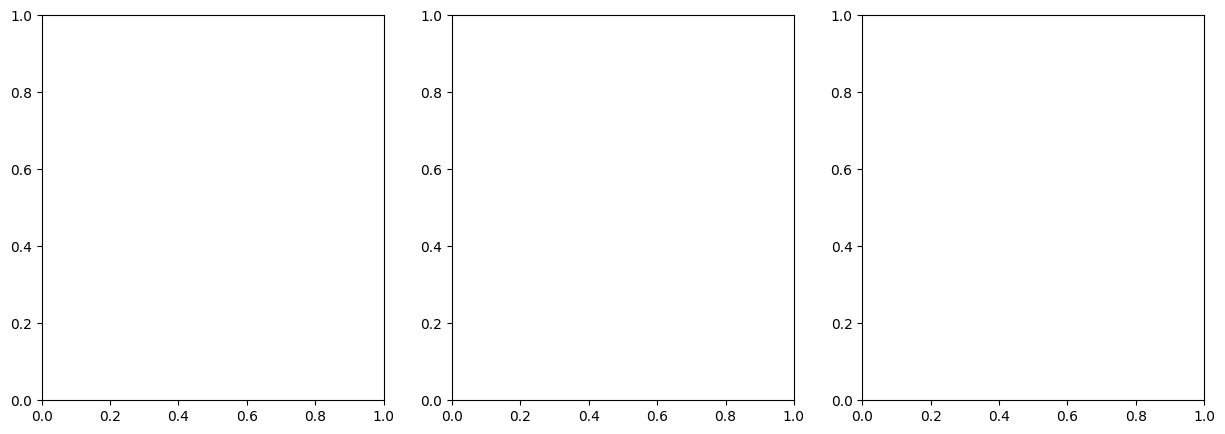

In [ ]:
# 3. Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

In [ ]:
# Original data
axes[0].scatter(data['Weight_index'], data['Ph'], c='blue', s=100)
for i, med in enumerate(data['Medicine']):
    axes[0].text(data['Weight_index'][i] + 0.1, data['Ph'][i] + 0.1, med)
axes[0].set_title('Original Data')
axes[0].set_xlabel('Weight Index')
axes[0].set_ylabel('Ph')
axes[0].grid(True, alpha=0.3)

In [ ]:
# K-Means results
colors = ['red', 'green']
for i in range(2):
    cluster_data = data[data['KMeans_Cluster'] == i]
    axes[1].scatter(cluster_data['Weight_index'], cluster_data['Ph'],
                    s=100, c=colors[i], label=f'Cluster {i}')
axes[1].set_title('K-Means Clustering')
axes[1].set_xlabel('Weight Index')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

In [ ]:
# Hierarchical results
for i in range(2):
    cluster_data = data[data['Hierarchical_Cluster'] == i]
    axes[2].scatter(cluster_data['Weight_index'], cluster_data['Ph'],
                    s=100, c=colors[i], label=f'Cluster {i}')
axes[2].set_title('Hierarchical Clustering')
axes[2].set_xlabel('Weight Index')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

In [ ]:
# 4. Display results
print("Clustering Results:")
print("=" * 50)
print(data.to_string(index=False))

Clustering Results:
Medicine  Weight_index  Ph  KMeans_Cluster  Hierarchical_Cluster
       A             1   1               0                     1
       B             2   1               0                     1
       C             4   3               1                     0
       D             5   4               1                     0


**Summery**

Unsupervised machine learning clustering is a powerful technique used to discover hidden patterns and structures within unlabeled data. Unlike supervised learning, it does not rely on predefined output labels. Its primary goal is to group similar data points together into 'clusters' based on the inherent relationships and characteristics of the data.

Key takeaways for unsupervised clustering are:

Discovery of Hidden Patterns: It excels at identifying natural groupings in data that might not be obvious to human observation.
No Labeled Data Required: This is a major advantage, as obtaining labeled data can be time-consuming and expensive.
Exploratory Data Analysis: Clustering serves as an excellent tool for initial data exploration, helping to understand the underlying distribution and segments within the data.
Applications: It has wide-ranging applications, such as customer segmentation, anomaly detection, document classification, image analysis, and, as demonstrated in this notebook, grouping similar items (like medicines) based on their properties.
Methods: Common algorithms like K-Means and Hierarchical Clustering offer different approaches to forming these groups, each with its own strengths and use cases.
In essence, unsupervised clustering allows us to make sense of complex, raw data by organizing it into meaningful categories, thereby revealing insights that can drive decision-making and further analysis.